In [1]:
import sys
workPath = '/home/jovyan/workspace'
if not workPath in sys.path:
    sys.path.append(workPath)

In [2]:
import planetengine
pfn = planetengine.functions
quickShow = planetengine.quickShow

In [3]:
system = planetengine.tests.testsystems.arrhenius()

In [4]:
myvar = pfn.convert(system.viscosityFn)

In [5]:
myvar2 = pfn.convert(system.viscosityFn, 'visc')

Old object found - reusing.


In [6]:
stressVar = pfn.convert(system.viscosityFn * system.velocityField, 'stress')

In [14]:
stressVar.var

In [18]:
myfig = planetengine.visualisation.QuickFig()

Fitted 0 variables to the figure.


In [21]:
myfig.add_arrows_red(stressVar)


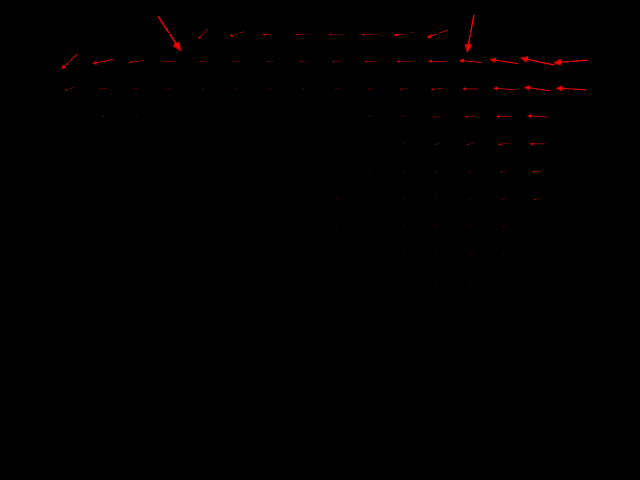

In [22]:
myfig.show()

In [17]:
import glucifer
fig = glucifer.Figure
fig.append(glucifer.objects.VectorArrows(system.mesh, stressVar))

TypeError: append() missing 1 required positional argument: 'drawingObject'

In [16]:
glucifer.objects.VectorArrows(system.mesh, stressVar)

In [ ]:
myvar.meshVar()

In [ ]:
from timeit import timeit

In [ ]:
def testfn1():
    system.iterate()
    myvar.meshVar()
def testfn2():
    system.iterate()
    system.reset()
    myvar.meshVar()

In [ ]:
timeit(myvar.meshVar, system.iterate, number = 100)

In [ ]:
timeit(myvar.meshVar, number = 100)

In [ ]:
myvar.meshVar()

In [ ]:
system.temperatureField.fn_gradient.evaluate(system.mesh)

In [ ]:
mesh = planetengine.utilities.get_substrate(system.viscosityFn)

In [ ]:
mesh is system.mesh

In [ ]:
mesh

In [ ]:
import underworld as uw
_fn = uw.function
UWFn = _fn._function.Function

In [ ]:
isinstance(system.viscosityFn, UWFn)

In [ ]:
uw.mesh._meshvariable.MeshVariable:

In [ ]:
list(system.viscosityFn._underlyingDataItems)

In [ ]:
def get_substrates(var):
    if type(var) == uw.mesh._meshvariable.MeshVariable:
        meshes = [var.mesh,]
        swarms = []
    elif type(var) == uw.swarm._swarmvariable.SwarmVariable:
        swarm = var.swarm
        mesh = swarm.mesh
        meshes = [mesh,]
        swarms = [swarm,]
    elif isinstance(var, UWFn):
        underlying = list(var._underlyingDataItems)
        meshes = []
        swarms = []
        for item in underlying:
            under_meshes, under_swarms = get_substrates(item)
            meshes.extend(under_meshes)
            swarms.extend(under_swarms)
        meshes = list(set(meshes))
        swarms = list(set(swarms))
    else:
        raise Exception("Input not recognised.")
    meshes = list(sorted(meshes))
    swarms = list(sorted(swarms))
    return meshes, swarms

In [ ]:
def get_prioritySubstrate(var):
    meshes, swarms = get_substrates(var)
    if len(swarms) > 0:
        substrate = swarms[0]
    elif len(meshes) > 0:
        substrate = meshes[0]
    else:
        substrate = None
    return substrate

def get_sampleData(var):
    substrate = get_prioritySubstrate(var)
    if substrate is None:
        evalCoords = None
    else:
        evalCoords = substrate.data[0:1]
    sample_data = var.evaluate(evalCoords)
    return sample_data

def get_varDim(var):
    sample_data = get_sampleData(var)
    varDim = sample_data.shape[-1]
    return varDim

In [ ]:
get_varDim(fn.misc.constant(1))

In [ ]:
stress = system.viscosityFn * system.velocityField

In [ ]:
get_substrates(stress)

In [ ]:
mylist = ['a']
mylist.extend(['b', 'c'])
mylist